In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Dini/Downloads/gold_price_data.csv", encoding="utf-8")
print("Shape:", df.shape)
print("Columns:\n", df.columns)
print(df.head())


Shape: (5215, 7)
Columns:
 Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')
         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [3]:
print("Missing values:")
print(df.isnull().sum())
print("\n Number of duplicate rows:", df.duplicated().sum())


Missing values:
date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

 Number of duplicate rows: 0


In [4]:
print(df.describe())


              open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


<Figure size 1200x800 with 0 Axes>

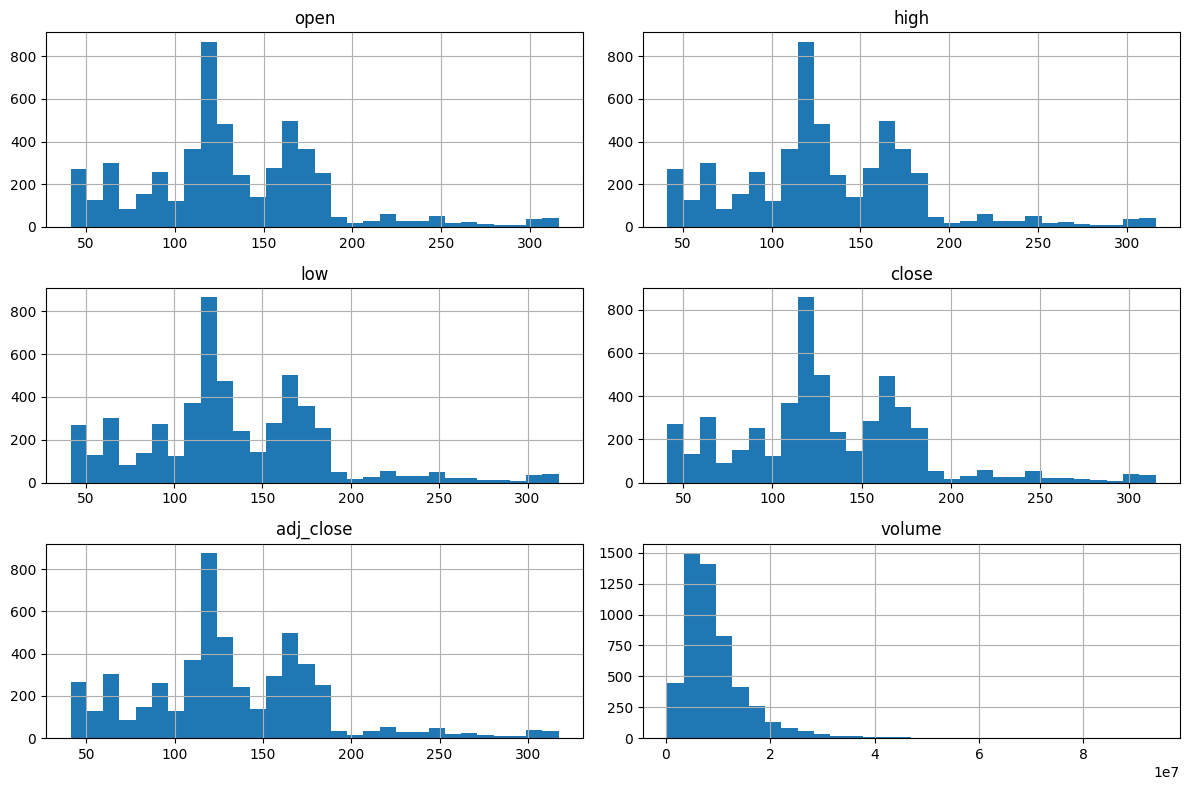

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df[['open','high','low','close','adj_close','volume']].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [10]:
!python -m pip install seaborn


In [12]:
import seaborn as sns
corr_matrix = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()


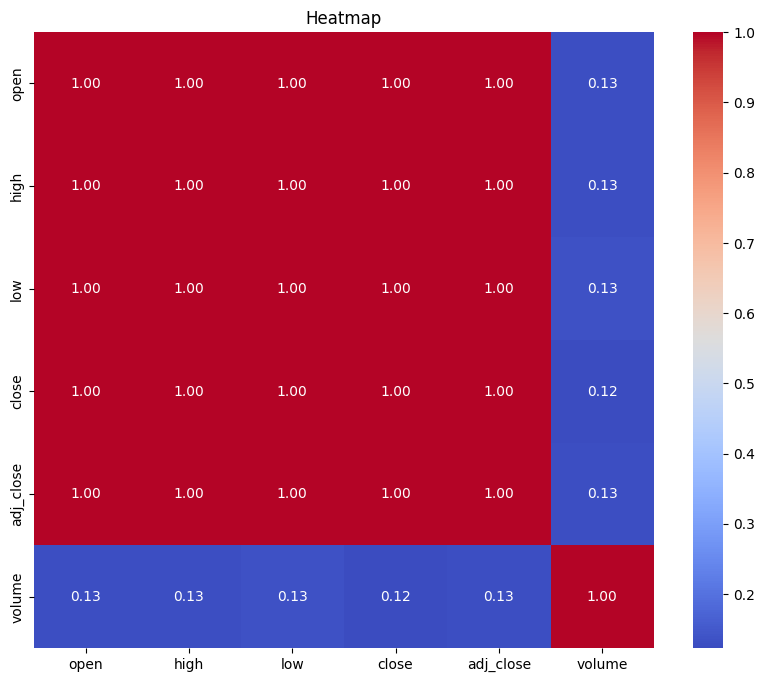

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

display = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(display.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("X shape:", X.shape)
print(X.head())   
print("\nY shape:", y.shape)
print(y.head())   


X shape: (5215, 6)
         date       open       high        low      close  adj_close
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000

Y shape: (5215,)
0     5992000
1    11655300
2    11996000
3     3169200
4     6105100
Name: volume, dtype: int64


In [16]:
df = df.select_dtypes(include=['float64','int64'])


In [17]:
X = df.drop(columns=['close'])   
y = df['close']

In [19]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 2.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.7 MB 2.7 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.7 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 2.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.7 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 3.3 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 3.5 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 3.6 MB/s eta 0:00:01
   -----------------------

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:\n", X_train.head())
print("\ny_test:\n", y_test.head())


X_train:
             open        high         low   adj_close    volume
2173  120.949997  120.949997  122.349998  121.150002  14697100
927    91.730003   91.730003   92.000000   91.389999   8809600
2499  118.519997  118.519997  118.820000  118.709999   6417500
45     42.240002   42.240002   42.560001   42.529999   1332500
1741  161.839996  161.839996  162.029999  159.960007  15390800

y_test:
 1897    154.869995
877      86.230003
4431    169.509995
4724    177.509995
1595    138.669998
Name: close, dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 0.1350977651853262
Root Mean Squared Error: 0.367556478905387
R² Score: 0.9999493679331679


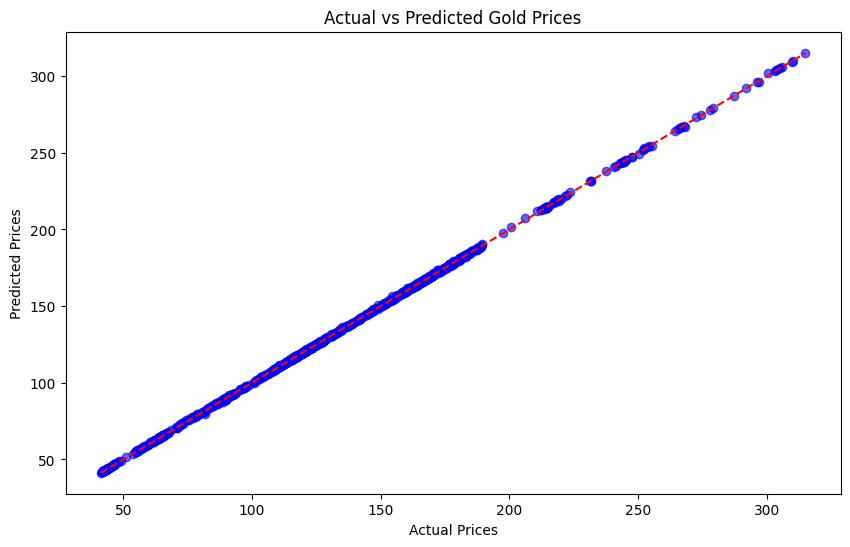

In [22]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Gold Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [23]:
coef_df = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_})
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

print(coef_df)


     Feature   Coefficient  Abs_Coefficient
3  adj_close  6.258093e-01     6.258093e-01
1       high  3.618257e-01     3.618257e-01
0       open  3.618257e-01     3.618257e-01
2        low -3.520350e-01     3.520350e-01
4     volume -2.883189e-08     2.883189e-08
